# SETUP

In [9]:
# /mnt/lustre/scratch/CBRA/projects/CSVS/spanishTest/v2.0/machine_learning

In [10]:
%matplotlib inline
from dotenv import find_dotenv, load_dotenv
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
RANDOM_SEED = 42

In [12]:
plt.style.use("ggplot")
sns.set_context("notebook")

In [13]:
dotenv_file_path = Path(find_dotenv())
dotenv_file_path

PosixPath('/home/cloucera/projects/spanishTest/.env')

In [14]:
project_path = dotenv_file_path.parent
project_path

PosixPath('/home/cloucera/projects/spanishTest')

In [15]:
load_dotenv(dotenv_file_path)
data_path = Path(os.environ.get("DATA_PATH"))
data_path

PosixPath('/data/projects/spanishTest/v2')

In [16]:
labels_training_path = data_path.joinpath("ids_1000g.R")
y_train = pd.read_csv(labels_training_path, header=None, sep=" ", index_col=0, names=["nationality", "continent"])
y_train.head()

,nationality,continent
HG00096,British,European
HG00097,British,European
HG00099,British,European
HG00100,British,European
HG00101,British,European


In [17]:
y_train.shape

(2504, 2)

In [18]:
features_training_path = data_path.joinpath("plink.26.Q")
features_training_path

PosixPath('/data/projects/spanishTest/v2/plink.26.Q')

In [20]:
X_train = pd.read_csv(features_training_path, header=None, sep=" ")
X_train.index = y_train.index
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
HG00096,0.00001,0.00001,0.00001,0.00001,0.000010,0.000010,0.00001,0.00001,0.00001,0.00001,...,0.000010,0.00001,0.058456,0.078883,0.00001,0.00001,0.00001,0.339164,0.000010,0.00001
HG00097,0.00001,0.00001,0.00001,0.00001,0.000010,0.110726,0.00001,0.00001,0.00001,0.00001,...,0.000010,0.00001,0.000010,0.000010,0.00001,0.00001,0.00001,0.000010,0.393844,0.00001
HG00099,0.00001,0.00001,0.00001,0.00001,0.000010,0.120551,0.00001,0.00001,0.00001,0.00001,...,0.000010,0.00001,0.000010,0.000010,0.00001,0.00001,0.00001,0.358482,0.000010,0.00001
HG00100,0.00001,0.00001,0.00001,0.00001,0.000010,0.000010,0.00001,0.00001,0.00001,0.00001,...,0.205808,0.00001,0.243461,0.000010,0.00001,0.00001,0.00001,0.065509,0.000010,0.00001
HG00101,0.00001,0.00001,0.00001,0.00001,0.005575,0.000010,0.00001,0.00001,0.00001,0.00001,...,0.000010,0.00001,0.043336,0.000010,0.00001,0.00001,0.00001,0.050009,0.287784,0.00001


In [21]:
X_train.to
X_train.shape

(2504, 26)

In [22]:
train_data = pd.concat((X_train, y_train), axis=1)
train_data.reset_index(inplace=True)
# train_data.to_feather(data_path.joinpath("train_data.feather"))
train_data.head()

,index,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,nationality,continent
0,HG00096,0.00001,0.00001,0.00001,0.00001,0.000010,0.000010,0.00001,0.00001,0.00001,...,0.058456,0.078883,0.00001,0.00001,0.00001,0.339164,0.000010,0.00001,British,European
1,HG00097,0.00001,0.00001,0.00001,0.00001,0.000010,0.110726,0.00001,0.00001,0.00001,...,0.000010,0.000010,0.00001,0.00001,0.00001,0.000010,0.393844,0.00001,British,European
2,HG00099,0.00001,0.00001,0.00001,0.00001,0.000010,0.120551,0.00001,0.00001,0.00001,...,0.000010,0.000010,0.00001,0.00001,0.00001,0.358482,0.000010,0.00001,British,European
3,HG00100,0.00001,0.00001,0.00001,0.00001,0.000010,0.000010,0.00001,0.00001,0.00001,...,0.243461,0.000010,0.00001,0.00001,0.00001,0.065509,0.000010,0.00001,British,European
4,HG00101,0.00001,0.00001,0.00001,0.00001,0.005575,0.000010,0.00001,0.00001,0.00001,...,0.043336,0.000010,0.00001,0.00001,0.00001,0.050009,0.287784,0.00001,British,European


In [ ]:
train_data.to_pickle()

# Clustering

In [23]:
from sklearn import manifold
import numpy as np

query = y_train.continent == "European"

In [24]:
query = np.repeat(True, y_train.shape[0])

In [25]:
tsne = manifold.TSNE(init="pca", n_iter=10**4, metric="cosine")
X_t = tsne.fit_transform(X_train.loc[query, :])

In [26]:
data = pd.DataFrame(X_t, index=X_train.index[query], columns=["tsne_0", "tsne_1"])
data["nationality"] = y_train.loc[query, "nationality"]
data["continent"] = y_train.loc[query, "continent"]

In [27]:
data.nationality.unique().size

26

In [28]:
missclass = ["Mexican-American", "Spanish", "Tuscan", "Puerto", "CEPH"]

def select_marker(key):
    marker = "s" if key in missclass else "."
    if key == "Puerto": marker = "^"
    return marker

symbols = {
    key: select_marker(key)
    for key in data.nationality.unique()
}

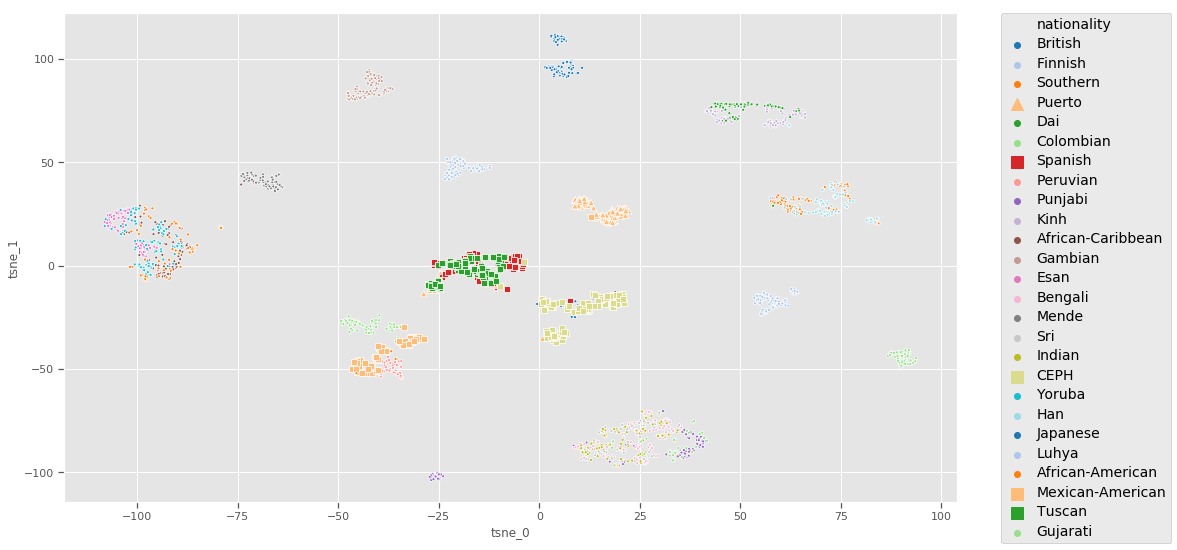

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.set_palette("tab20", n_colors=26)
sns.scatterplot(
    x="tsne_0",
    y="tsne_1",
    hue="nationality",
    style="nationality",
    markers=symbols,
    data=data,
    ax=ax
)

# Put the legend out of the figure
lgnd = plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0., markerscale=2)
plt.setp(ax.get_legend().get_texts(), fontsize='14'); # for legend text

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV

In [33]:
from sklearn.model_selection import cross_val_score, cross_val_predict


In [34]:
from sklearn.metrics import classification_report

In [36]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.utils.testing import ignore_warnings
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

In [37]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import RobustScaler, StandardScaler
from tpot.builtins import StackingEstimator, ZeroCount
from sklearn.model_selection import cross_val_score


# Average CV score on the training set was:0.9146285310055363
clf = make_pipeline(
    StandardScaler(),
    StackingEstimator(estimator=KNeighborsClassifier(n_neighbors=40, p=2, weights="uniform")),
    StackingEstimator(estimator=LogisticRegression(C=5.0, dual=False, penalty="l1")),
    RobustScaler(),
    ZeroCount(),
    PCA(iterated_power=4, svd_solver="randomized"),
    LogisticRegression(C=20.0, dual=False, penalty="l1")
)

In [38]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import GradientBoostingClassifier

# clf = ExtraTreeClassifier()
# clf = RidgeClassifierCV()
# clf = GradientBoostingClassifier()

In [39]:
xtr, xts, ytr, yts = train_test_split(X_train, y_train.nationality == "Spanish", test_size=0.3, stratify=y_train.nationality)

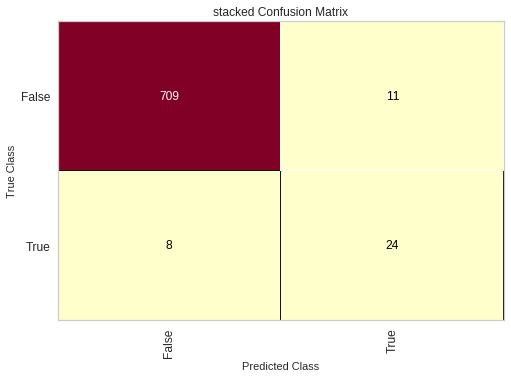

In [40]:
name = "stacked"

fig, ax = plt.subplots()

cm = ConfusionMatrix(clf, ax=ax)

with ignore_warnings():
    cm.fit(xtr, ytr)

cm.score(xts, yts)
cm.finalize()
#     cm.poof()
ax.set_title("{} Confusion Matrix".format(name))
plt.show()

In [41]:
from sklearn.preprocessing import LabelBinarizer

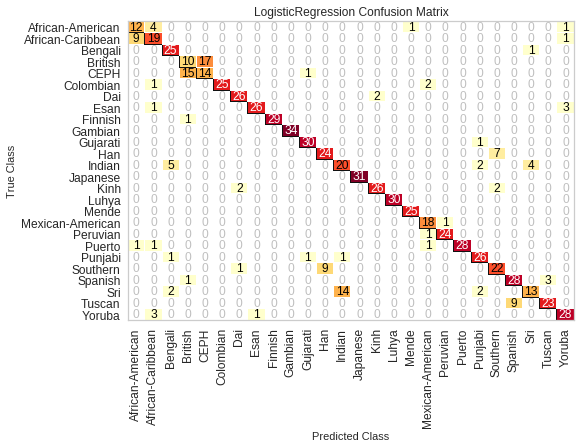

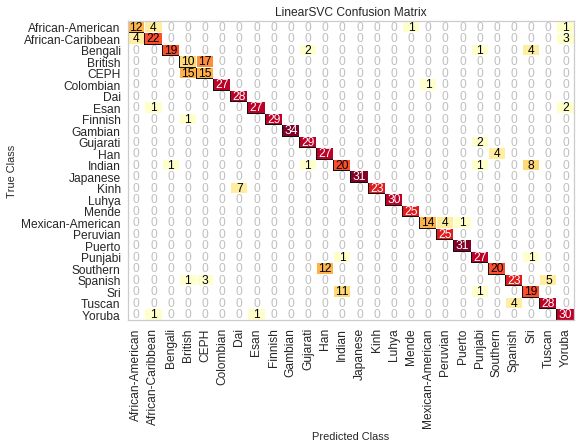

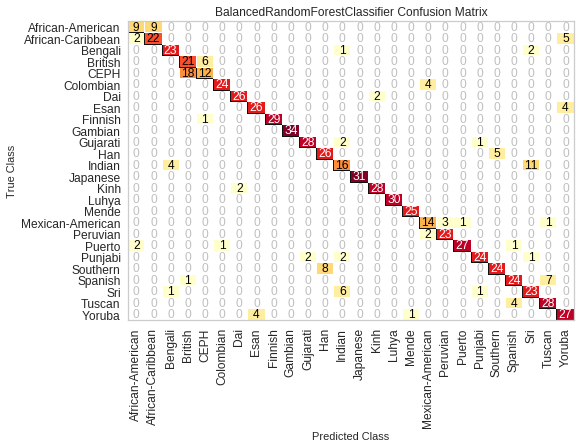

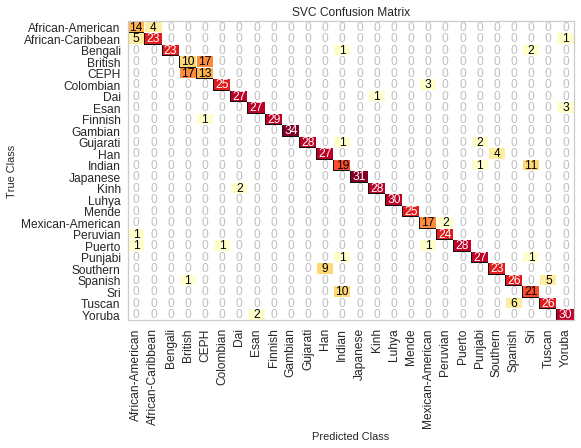

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier

y_train_3 = [y if y in ["Spanish", "Tuscan"] else "Other" for y in y_train.nationality]

xtr, xts, ytr, yts = train_test_split(X_train, y_train.nationality, test_size=0.3, stratify=y_train.nationality)

classifiers = [
    (LogisticRegression(solver='lbfgs', random_state=0, class_weight="balanced"), {
        'C': np.logspace(-2, 7, 10)
    }),
    (LinearSVC(random_state=0, class_weight="balanced"), {
        'C': np.logspace(-2, 7, 10)
    }),
    (BalancedRandomForestClassifier(n_estimators=500, random_state=0), {
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]
    }),
    (SVC(random_state=0, gamma='auto', class_weight="balanced"), {
        'C': np.logspace(-2, 7, 10)
    }),
]

def get_name(estimator):
    name = estimator.__class__.__name__
    if name == 'Pipeline':
        name = [get_name(est[1]) for est in estimator.steps]
        name = ' + '.join(name)
    return name

names = [get_name(e) for e, g in classifiers]

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

for est_idx, (name, (estimator, param_grid)) in enumerate(zip(names, classifiers)):
    
    fig, ax = plt.subplots()
    
    clf = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, iid=False)

    cm = ConfusionMatrix(clf, ax=ax)
    
    with ignore_warnings(category=ConvergenceWarning):
        cm.fit(xtr, ytr)

    cm.score(xts, yts)
    cm.finalize()
#     cm.poof()
    ax.set_title("{} Confusion Matrix".format(name))
    plt.show()

In [43]:
clf.best_estimator_

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
clm = make_pipeline(
    SVC(C=1000.0, cache_size=200, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
)

clm.fit(xtr, ytr)

print(classification_report(ytr, clm.predict(xtr)))
print(classification_report(yts, clm.predict(xts)))

cross_val_score(clm, xtr, ytr)

                   precision    recall  f1-score   support

 African-American       0.91      0.93      0.92        43
African-Caribbean       0.94      0.96      0.95        67
          Bengali       0.97      0.95      0.96        60
          British       0.67      0.44      0.53        64
             CEPH       0.61      0.78      0.68        69
        Colombian       1.00      0.97      0.98        66
              Dai       0.94      0.92      0.93        65
             Esan       0.92      0.94      0.93        69
          Finnish       1.00      1.00      1.00        69
          Gambian       1.00      1.00      1.00        79
         Gujarati       1.00      0.92      0.96        72
              Han       0.93      0.78      0.85        72
           Indian       0.63      0.59      0.61        71
         Japanese       1.00      1.00      1.00        73
             Kinh       0.93      0.93      0.93        69
            Luhya       1.00      1.00      1.00       

array([0.81725888, 0.83333333, 0.85146805])

In [45]:
from sklearn.metrics import classification_report

y_true = np.array(y_train_3)
y_hat = y_true.copy()
y_hat[y_true == "Other"] = "Tuscan"
y_hat[y_true == "Tuscan"] = "Other"


print(classification_report(y_true, y_hat))

              precision    recall  f1-score   support

       Other       0.00      0.00      0.00      2290
     Spanish       1.00      1.00      1.00       107
      Tuscan       0.00      0.00      0.00       107

   micro avg       0.04      0.04      0.04      2504
   macro avg       0.33      0.33      0.33      2504
weighted avg       0.04      0.04      0.04      2504



In [59]:
%load_ext autoreload
%autoreload 2
from autoxgb import OptimizedXGB

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
xtr, xts, ytr, yts =  train_test_split(
    X_train, 
    y_train["nationality"].values.ravel() == "Spanish", 
    test_size=0.3,
    stratify=y_train["nationality"].values.ravel() == "Spanish"
)
xtr.shape, xts.shape, ytr.shape, yts.shape

((1752, 26), (752, 26), (1752,), (752,))

In [62]:
xgb = OptimizedXGB()

In [63]:
%%capture

xgb.fit(xtr, ytr)

In [64]:
ytr_hat = xgb.predict(xtr)
proba_train = xgb.predict_proba(xtr)

yts_hat = xgb.predict(xts)
proba_test = xgb.predict_proba(xts)

In [65]:
print(classification_report(yts, yts_hat))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       720
        True       0.79      0.69      0.73        32

   micro avg       0.98      0.98      0.98       752
   macro avg       0.89      0.84      0.86       752
weighted avg       0.98      0.98      0.98       752



In [66]:
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.externals.funcsigs import signature

In [67]:
def plot_model(proba, y, split):
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import average_precision_score, precision_recall_curve
    from sklearn.externals.funcsigs import signature
    
    fpr, tpr, _ = roc_curve(y, proba[:, 1])
    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(y, proba[:, 1])
    precision, recall, _ = precision_recall_curve(y, proba[:, 1])

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))

    # ROC
    lw = 2
    axes[0].plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    axes[0].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    axes[0].set_xlim([0.0, 1.0])
    axes[0].set_ylim([0.0, 1.05])
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title("ROC")
    axes[0].legend(loc="lower right")

    step_kwargs = ({'step': 'post'}
                if 'step' in signature(plt.fill_between).parameters
                else {})
    axes[1].step(recall, precision, color='b', alpha=0.2,
            where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    # P-R curve
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.suptitle(split)
    # plt.tight_layout()

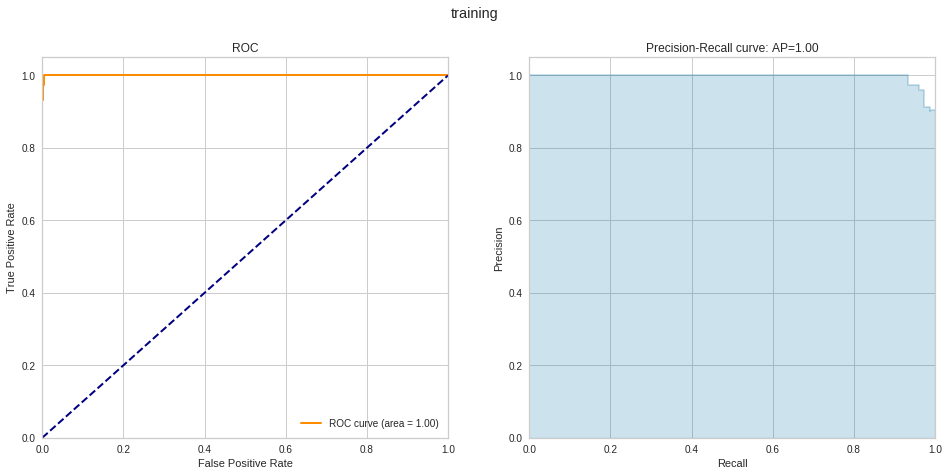

In [68]:
plot_model(proba_train, ytr, split="training")

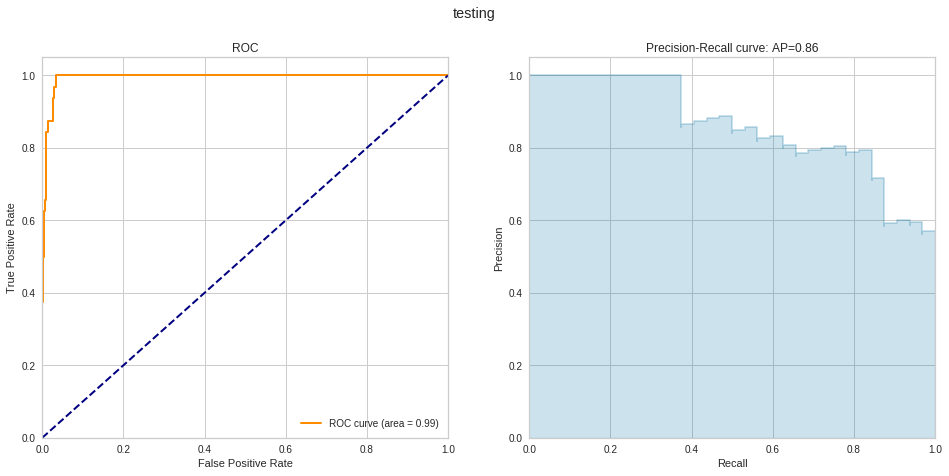

In [69]:
plot_model(proba_test, yts, split="testing")

In [70]:
np.random.rand(*proba_test.shape).shape

(752, 2)

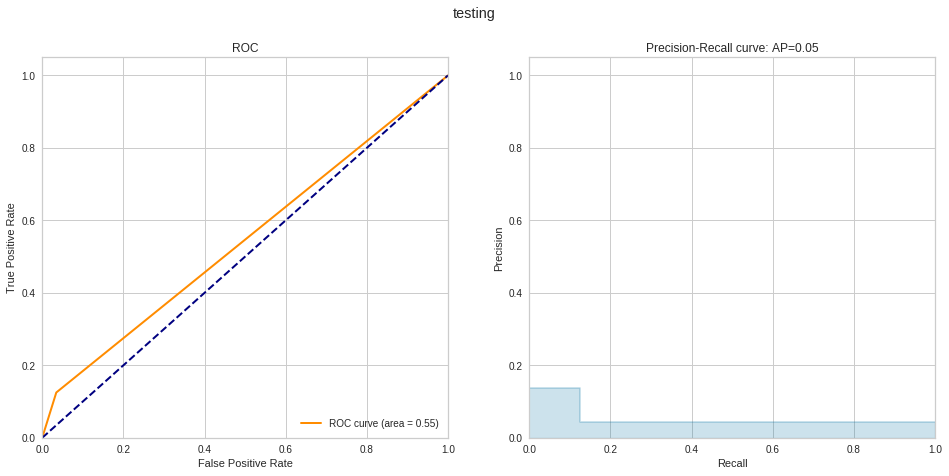

In [73]:
from sklearn.dummy import DummyClassifier

dmc = DummyClassifier()
dmc.fit(xtr, ytr)
dyts = dmc.predict_proba(xts)

plot_model(dyts, yts, split="testing")

In [74]:
xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.55, gamma=1.0, learning_rate=0.02646990554120814,
       max_delta_step=0, max_depth=13, min_child_weight=4.0, missing=None,
       n_estimators=10000, n_jobs=1, nthread=7,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.7000000000000001, verbose=False, verbose_eval=False)

In [75]:
from sklearn.model_selection import cross_val_score

clf = xgb.best_estimator_

cross_val_score(clf, X_train, y_train["nationality"].values.ravel() == "Spanish", cv=10, n_jobs=-1, scoring="average_precision")

array([0.78391507, 0.93097643, 1.        , 1.        , 1.        ,
       1.        , 0.86277654, 1.        , 1.        , 0.30725035])

In [143]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import RobustScaler, StandardScaler
from tpot.builtins import StackingEstimator, ZeroCount
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import DotProduct
from imblearn.ensemble import BalancedRandomForestClassifier

kernel=DotProduct()

# Average CV score on the training set was:0.9146285310055363
spclf = make_pipeline(
    StandardScaler(),
    StackingEstimator(estimator=KNeighborsClassifier(n_neighbors=40, p=2, weights="uniform")),
    StackingEstimator(estimator=LogisticRegression(C=5.0, dual=False, penalty="l1", max_iter=10**4)),
    RobustScaler(),
    ZeroCount(),
    PCA(iterated_power=4, svd_solver="randomized"),
    LogisticRegression(C=20.0, dual=False, penalty="l1", max_iter=10**4)
)

In [77]:
y_train.nationality.value_counts()

Gambian              113
Yoruba               108
Spanish              107
Tuscan               107
Southern             105
Japanese             104
Puerto               104
Han                  103
Gujarati             103
Sri                  102
Indian               102
Luhya                 99
CEPH                  99
Esan                  99
Finnish               99
Kinh                  99
Punjabi               96
African-Caribbean     96
Colombian             94
Dai                   93
British               91
Bengali               86
Peruvian              85
Mende                 85
Mexican-American      64
African-American      61
Name: nationality, dtype: int64

In [136]:
y_train_bin = y_train.nationality.str.contains("Spanish|Tuscan").values.ravel()

In [79]:
y_train.nationality[y_train_bin].value_counts()

Spanish    107
Tuscan     107
Name: nationality, dtype: int64

In [80]:
X_train_ = X_train.loc[y_train_bin, :]
y_train_bin_ = y_train.nationality[y_train_bin].values.ravel()

In [81]:
cross_val_score(BalancedRandomForestClassifier(n_estimators=10**3, n_jobs=-1), X_train, y_train_bin, cv=10, n_jobs=-1, scoring="f1")

array([0.93333333, 0.84615385, 0.89795918, 1.        , 1.        ,
       1.        , 0.91304348, 1.        , 1.        , 0.82352941])

In [83]:
cross_val_score(clf, X_train_, y_train_bin_, cv=10, n_jobs=-1)

array([0.68181818, 0.68181818, 0.72727273, 0.5       , 0.72727273,
       0.72727273, 0.77272727, 0.8       , 0.85      , 0.9       ])

In [142]:
y_train_bin.shape, X_train.shape

((2504,), (2504, 26))

In [144]:
y_train_bin = y_train["nationality"].values.ravel() == "Spanish"
spclf.fit(X_train, y_train_bin)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('stackingestimator-1', StackingEstimator(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='unifo...penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [157]:
from sklearn.externals import joblib
joblib.dump(spclf, "default_model.skl")

['default_model.skl']

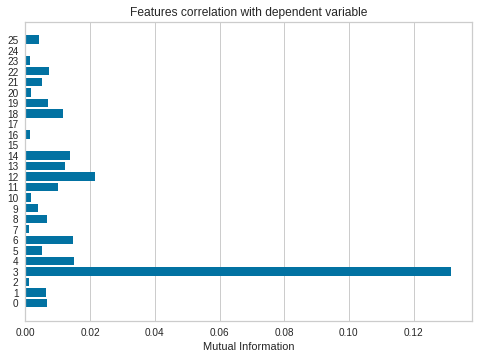

In [35]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

y_train_bin = y_train["nationality"].values.ravel() == "Tuscan"

visualizer = FeatureCorrelation(method='mutual_info-classification', labels=X_train.columns)
visualizer.fit(X_train, y_train_bin)
visualizer.poof()

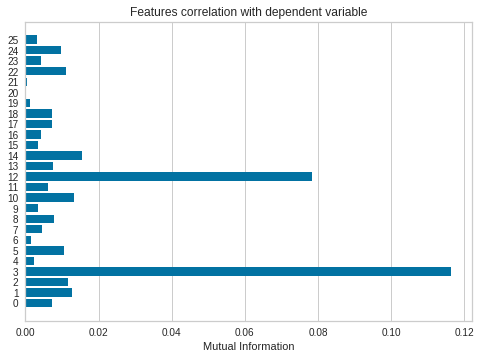

In [36]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

y_train_bin = y_train["nationality"].values.ravel() == "Spanish"

visualizer = FeatureCorrelation(method='mutual_info-classification', labels=X_train.columns)
visualizer.fit(X_train, y_train_bin)
visualizer.poof()

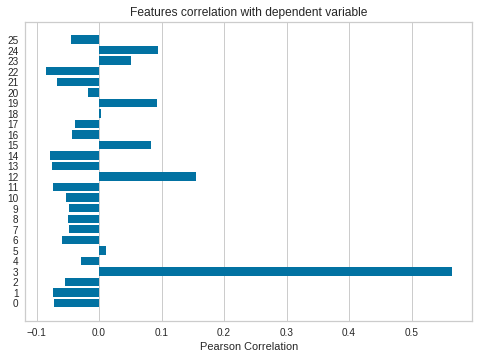

In [37]:
visualizer = FeatureCorrelation(labels=X_train.columns)
visualizer.fit(X_train, y_train_bin)
visualizer.poof()

In [38]:
## load test data

In [145]:
test_path = data_path.joinpath("samples")

In [146]:
test_path

PosixPath('/data/projects/spanishTest/v2/samples')

In [147]:
groups = []
sample_names = []
frames = []
for fpath in data_path.glob("**/*.Q"):
#     print(fpath)
    sample_name = fpath.parent.name
    group = fpath.parent.parent.name
    
    df = pd.read_csv(fpath, header=None, sep=" ")
    
    if df.shape[0] >= 1:
        groups.append(group)
        sample_names.append(sample_name)
        frames.append(df.iloc[0, :].copy())        
    
test_v2 = pd.concat(frames, axis=1, ignore_index=True).T
test_v2.index = sample_names
test_v2.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
v2,0.00001,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000010,0.000010,0.058456,0.078883,0.000010,0.000010,0.000010,0.339164,0.000010,0.000010
s38968,0.00001,0.008692,0.000012,0.378148,0.000010,0.025727,0.023235,0.000010,0.000010,0.007461,...,0.000010,0.006135,0.005880,0.002878,0.000010,0.000010,0.016949,0.023559,0.254341,0.004861
0202-008-COHO,0.00001,0.110810,0.007835,0.042746,0.029171,0.015380,0.003969,0.003752,0.004906,0.053637,...,0.008863,0.026140,0.000382,0.000010,0.016911,0.050100,0.009753,0.000010,0.259561,0.010897
0071-018-COHO_2,0.00001,0.022463,0.000010,0.234458,0.032649,0.000010,0.014272,0.001247,0.000874,0.015086,...,0.012613,0.003407,0.000010,0.001556,0.000010,0.004286,0.002995,0.000010,0.384946,0.015251
0027-009-COHO,0.00001,0.110810,0.007835,0.042746,0.029171,0.015380,0.003969,0.003752,0.004906,0.053637,...,0.008863,0.026140,0.000382,0.000010,0.016911,0.050100,0.009753,0.000010,0.259561,0.010897


In [148]:
v2 = test_v2.copy()
v2["groups"] = groups
v2[v2.groups.str.contains("Anti")]

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,groups
RP1m38,0.000010,0.011813,0.000010,0.254263,0.018495,0.000010,0.000010,0.013885,0.001278,0.003684,...,0.003322,0.000010,0.012535,0.000010,0.000010,0.015733,0.00001,0.405707,0.000010,wgsAntinolo_290119
RP331m5643,0.000010,0.006321,0.000010,0.229883,0.000010,0.000010,0.022014,0.000010,0.001836,0.003740,...,0.017094,0.000010,0.006995,0.002245,0.000010,0.000010,0.00001,0.418723,0.013339,wgsAntinolo_290119
RP464m13955,0.000011,0.006514,0.000010,0.235760,0.017454,0.000010,0.000010,0.003105,0.000010,0.010245,...,0.015141,0.000010,0.002309,0.000010,0.000010,0.009332,0.00001,0.419710,0.000010,wgsAntinolo_290119
RP399m10008,0.000010,0.002913,0.000010,0.187126,0.032423,0.093868,0.000010,0.000010,0.000017,0.004133,...,0.030604,0.000010,0.002428,0.001773,0.000010,0.004746,0.00001,0.361198,0.003469,wgsAntinolo_290119
RP109m9094,0.000010,0.011399,0.000010,0.233230,0.004179,0.016255,0.007543,0.000010,0.000010,0.003925,...,0.006882,0.000010,0.008096,0.001506,0.000013,0.003890,0.00001,0.392381,0.019859,wgsAntinolo_290119
RP213m2505,0.000010,0.009082,0.000010,0.182686,0.017935,0.019061,0.000010,0.000010,0.001163,0.005351,...,0.036602,0.000010,0.003841,0.000010,0.000010,0.008440,0.00001,0.423931,0.001900,wgsAntinolo_290119
RP383m9215,0.000010,0.006126,0.000010,0.220753,0.025123,0.000010,0.000010,0.000020,0.001144,0.004399,...,0.019120,0.006583,0.002206,0.000010,0.000010,0.023515,0.00001,0.423457,0.000010,wgsAntinolo_290119
RP502m11145,0.000010,0.007205,0.000015,0.220044,0.005990,0.000064,0.005543,0.000010,0.002595,0.006330,...,0.013165,0.000010,0.003456,0.000498,0.000010,0.020551,0.00001,0.412968,0.000010,wgsAntinolo_290119
RP184m1878,0.000010,0.008278,0.000010,0.261368,0.005956,0.001300,0.000010,0.000010,0.006289,0.004509,...,0.027467,0.000010,0.002171,0.000010,0.000010,0.017053,0.00001,0.414299,0.000010,wgsAntinolo_290119
RP432m23382,0.000010,0.005979,0.000010,0.235909,0.000208,0.000010,0.024214,0.000010,0.000288,0.003163,...,0.023504,0.000010,0.007726,0.000010,0.000010,0.000010,0.00001,0.405055,0.000010,wgsAntinolo_290119


In [149]:
test_v2_results = pd.DataFrame(
    {"is_spanish": spclf.predict(test_v2), "proba_spanish": spclf.predict_proba(test_v2)[:, 1], "group": groups},
    index=test_v2.index
)

test_v2_results.group = test_v2_results.group.str.split("_").str[0]
test_v2_results.drop(index=["v2"], axis=0, inplace=True)

In [150]:
test_v2_results.head()

,is_spanish,proba_spanish,group
s38968,True,0.999814,BmorteMCT8
0202-008-COHO,True,0.986244,enod
0071-018-COHO_2,True,0.999811,enod
0027-009-COHO,True,0.986244,enod
0081-015-COHO_3,True,0.986244,enod


is_spanish
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

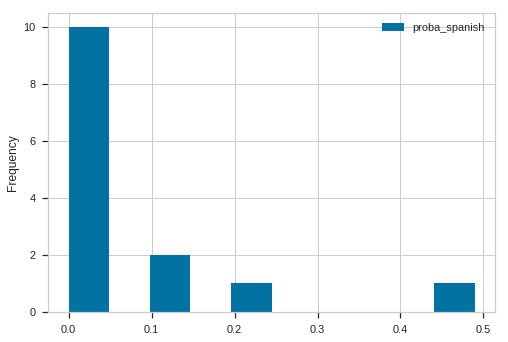

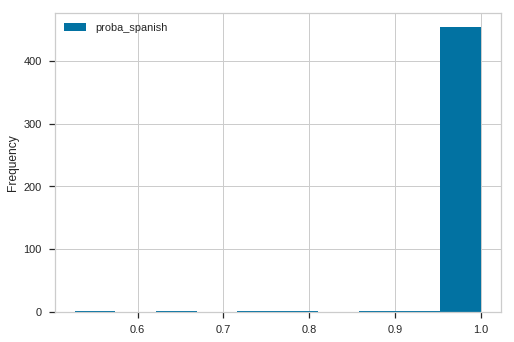

In [151]:
test_v2_results.groupby("is_spanish").plot(kind="hist")

In [152]:
test_v2_results.is_spanish.value_counts()

True     461
False     14
Name: is_spanish, dtype: int64

In [112]:
test_v2_results.to_csv("test_v2_result_stacking.tsv", sep="\t", index=True, index_label="sample_name")

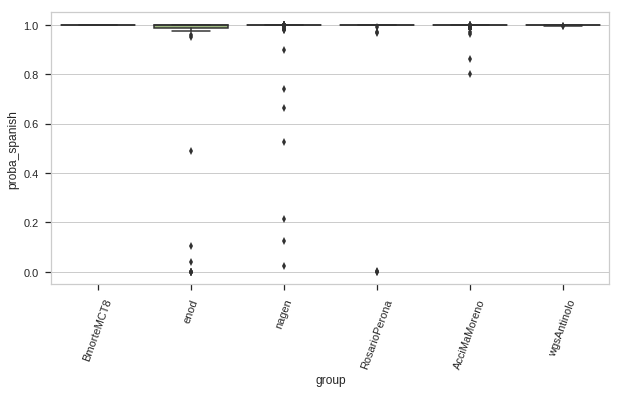

In [153]:
sns.set_context("notebook")

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x="group", y="proba_spanish", data=test_v2_results, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70); 

In [154]:
test_v2_results.loc[test_v2_results.group.str.contains("Rosario"), :]

,is_spanish,proba_spanish,group
IIB-F188,True,9.996469e-01,RosarioPerona
IIB-393P,False,4.295913e-03,RosarioPerona
IIB-282,True,9.996992e-01,RosarioPerona
IIB-400P,True,9.981921e-01,RosarioPerona
IIB-F311,True,9.998645e-01,RosarioPerona
IIB-F257,True,9.999983e-01,RosarioPerona
IIB-F187,True,9.996832e-01,RosarioPerona
IIB-F213,True,9.994889e-01,RosarioPerona
IIB-395,True,9.996513e-01,RosarioPerona
IIB-F606,True,9.999986e-01,RosarioPerona


In [155]:
test_v2_results[~test_v2_results.is_spanish]

,is_spanish,proba_spanish,group
0083-003-COHO,False,4.659997e-10,enod
0037-008-COHO_3,False,1.752506e-06,enod
0044-018-COHO_3,False,4.138674e-02,enod
0037-008-COHO_2,False,2.857507e-08,enod
0049-007-COHO,False,1.051206e-01,enod
0100-003-COHO,False,1.105089e-07,enod
0005-003-COHO,False,4.893767e-01,enod
0082-003-COHO,False,2.272203e-11,enod
IIB-393P,False,4.295913e-03,RosarioPerona
IIB-339,False,1.389508e-08,RosarioPerona


In [117]:
query_v2 = ["IIB-401", "IIB-412", "IIB-52", "IIB-198"]
test_v2_results.loc[query_v2, :]

KeyError: "None of [Index(['IIB-401', 'IIB-412', 'IIB-52', 'IIB-198'], dtype='object')] are in the [index]"

In [60]:
query_v2 = ["AC5399", "AC5378", "AC5390", "AC5409", "AC5415", "AC5532", "AC5533"]

test_v2_results.loc[query_v2, :]

,is_spanish,proba_spanish,group
AC5399,True,0.852776,nagen
AC5378,False,0.111328,nagen
AC5390,True,1.000000,nagen
AC5409,False,0.042896,nagen
AC5415,True,1.000000,nagen
AC5532,True,1.000000,nagen
AC5533,True,1.000000,nagen


In [61]:
test_v2_results[test_v2_results.proba_spanish < 0.9]

,is_spanish,proba_spanish,group
0083-003-COHO,False,0.022150,enod
0037-008-COHO_3,False,0.313213,enod
0199-008-COHO_3,True,0.876414,enod
0044-018-COHO_3,False,0.298261,enod
0171-007-COHO,False,0.085193,enod
0037-008-COHO_2,False,0.011344,enod
0100-003-COHO,False,0.455243,enod
0043-017-COHO_2,False,0.296433,enod
0082-003-COHO,False,0.000654,enod
AC5399,True,0.852776,nagen


In [52]:
X_train.shape

(2504, 26)

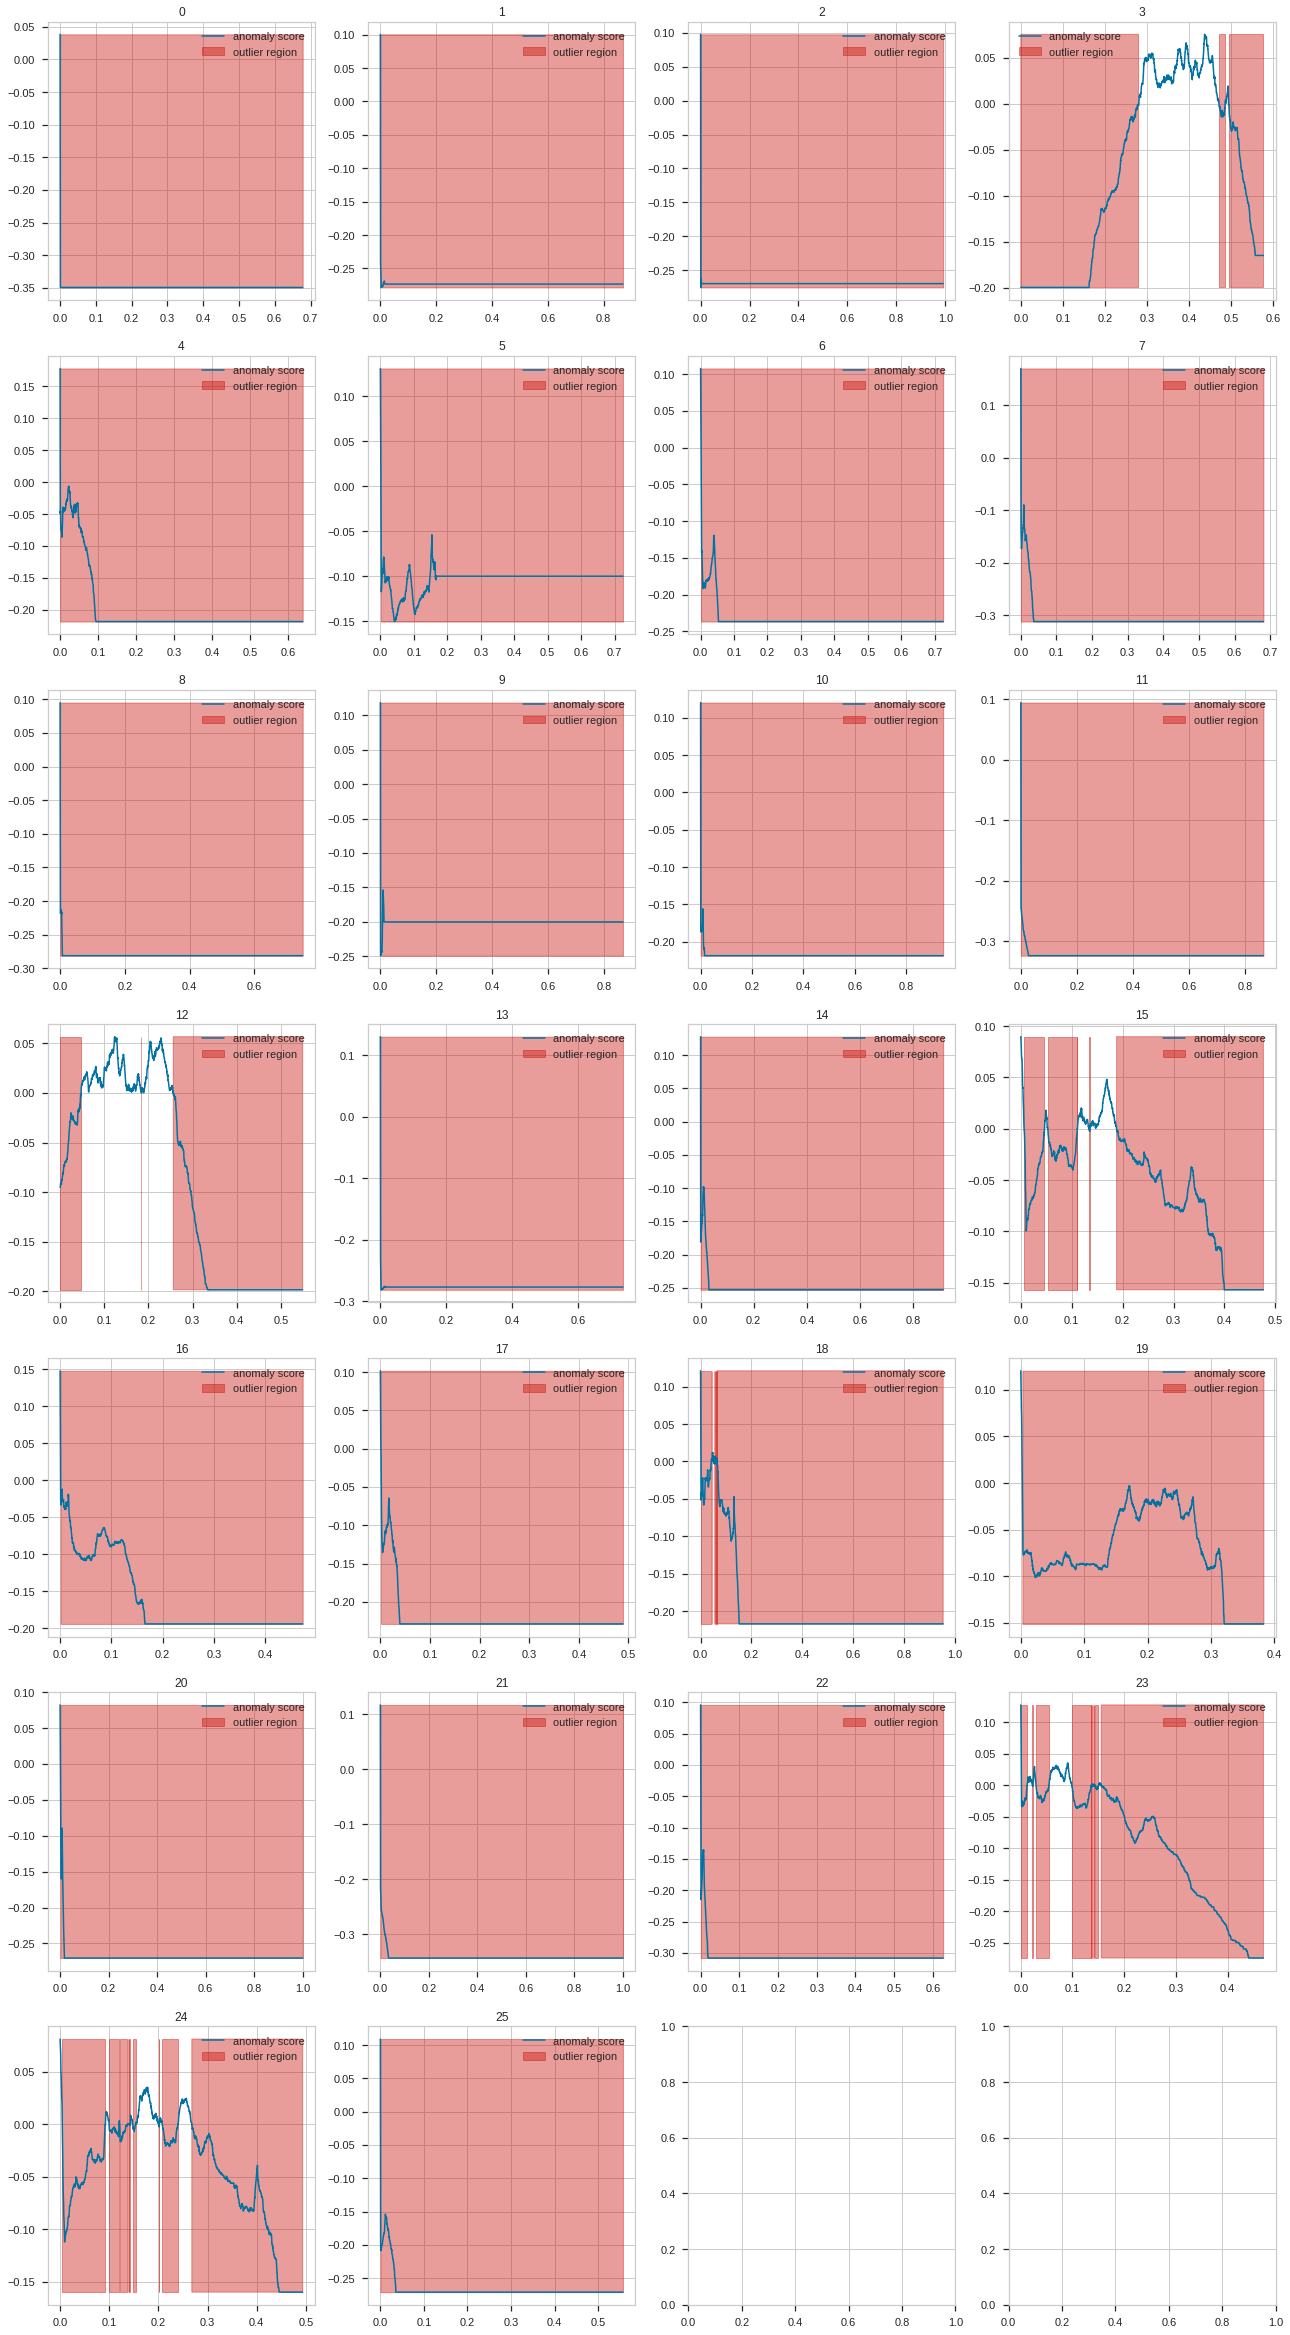

In [53]:
from sklearn.ensemble import IsolationForest

fig, axs = plt.subplots(7, 4, figsize=(22, 6*7), facecolor='w', edgecolor='k')
axs = axs.ravel()

df = X_train.loc[y_train_bin, :]

for i, column in enumerate(df.columns):
    isolation_forest = IsolationForest(contamination='auto', behaviour="new")
    isolation_forest.fit(df[column].values.reshape(-1,1))

    xx = np.linspace(X_train[column].min(), X_train[column].max(), len(X_train)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In [54]:
from sklearn.neighbors import LocalOutlierFactor

clust = LocalOutlierFactor(n_neighbors=50, contamination='auto')

In [55]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.cluster import DBSCAN

# scale data first
X = StandardScaler().fit_transform(df)

db = clust.fit(X)

In [56]:
db

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=50, novelty=False, p=2)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
pd.crosstab(y_train.nationality.values, y_train.labels, rownames=['truth'], colnames=['pred'], margins=True) 

AttributeError: 'DataFrame' object has no attribute 'labels'

In [ ]:
v3_path = data_path.parent.joinpath("v3")
v3_path

In [ ]:
v3_projections_path = v3_path.joinpath("projections")

In [ ]:
sample_names = []
frames = []

for fpath in v3_projections_path.glob("**/*.Q"):
#     print(fpath)
    sample_name = fpath.parent.name
    
    df = pd.read_csv(fpath, header=None, sep=" ")
    
    if df.shape[0] >= 1:
        sample_names.append(sample_name)
        frames.append(df.iloc[0, :].copy())        
    
test_v3 = pd.concat(frames, axis=1, ignore_index=True).T
test_v3.index = sample_names
test_v3.head()

In [ ]:
test_v3.plot()

In [ ]:
v3_train_path = v3_path.joinpath("plink.3.Q")
v3_metadata_path = v3_path.joinpath("samples")

v3_metadata = pd.read_csv(v3_metadata_path, header=None, sep="\t", names=["class", "index"], index_col=1)

v3_train = pd.read_csv(v3_train_path, header=None, sep=" ")
v3_train.index = v3_metadata.index

In [ ]:
v3_metadata.head()

In [ ]:
v3_train.head()

In [ ]:
v3_tsne = pd.DataFrame(manifold.TSNE(random_state=42).fit_transform(v3_train))
v3_tsne.plot(kind="scatter", x=0, y=1, figsize=(16, 9))

In [ ]:
v3_train.plot(style=".", subplots=True, figsize=(16, 9))

In [ ]:
test_v3.index

In [ ]:
test_v3.plot()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# fit the model
clf = IsolationForest(behaviour='new', max_samples=100,
                      random_state=rng, contamination='auto')
clf.fit(v3_train)
y_pred_train = clf.predict(v3_train)
y_pred_test = clf.predict(test_v3)

In [ ]:
y_pred_train

In [ ]:
query = v3_metadata.loc[v3_train.index, "class"] == "IBS"
data_filt = v3_train.loc[query, :]

v3_tsne = pd.DataFrame(manifold.TSNE(random_state=42).fit_transform(data_filt), columns=["tsne0", "tsne1"], index=data_filt.index)
# v3_tsne["inlier"] = data_filt
v3_tsne["class"] = v3_metadata.loc[query, "class"].values
plt.figure(figsize=(16, 9))
sns.scatterplot(x="tsne0", y="tsne1", data=v3_tsne)

In [ ]:
v3_train.loc["HG01502"]

In [ ]:
v3_metadata["class"].value_counts()

In [ ]:
v3_tsne.inlier.value_counts()

In [ ]:
y_pred_test

In [ ]:
X_train.index.isin(v3_train.index).sum(), X_train.shape

In [ ]:
v3_data = v3_train.copy()
v3_data["class"] = v3_metadata.loc[v3_train.index, "class"].values

In [ ]:
query = v3_data["class"] == "IBS"
v3_data.loc[query, 1].plot(style=".")

In [ ]:
query =  v3_data["class"] == "TSI"
v3_data.loc[query, 1].plot(style=".")

In [ ]:
query =  v3_data["class"] == "NAV"
v3_data.loc[query, :].plot()

In [ ]:
v3_train.index.tolist()

In [ ]:
X_train.shape, y_train_bin.shape

In [60]:
X_train_lof = X_train.loc[y_train_bin, :]

In [61]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=5, novelty=True, contamination=0.01)
clf.fit(X_train_lof)
pd.Series(clf.predict(X_train.loc[~y_train_bin, :])).value_counts(), sum(y_train_bin)

(-1    2302
  1      95
 dtype: int64, 107)

In [62]:
pd.Series(clf.predict(test_v2)).value_counts()

-1    252
 1    196
dtype: int64

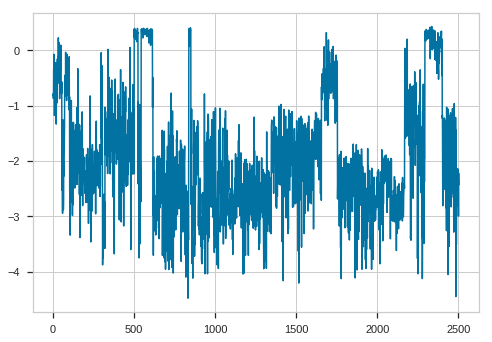

In [63]:
plt.plot(clf.decision_function(X_train))

In [64]:
df1 = pd.DataFrame({"fun": spclf.decision_function(X_train), "nation": y_train.nationality, "proba":spclf.predict_proba(X_train)[:, 1]}, index=X_train.index)

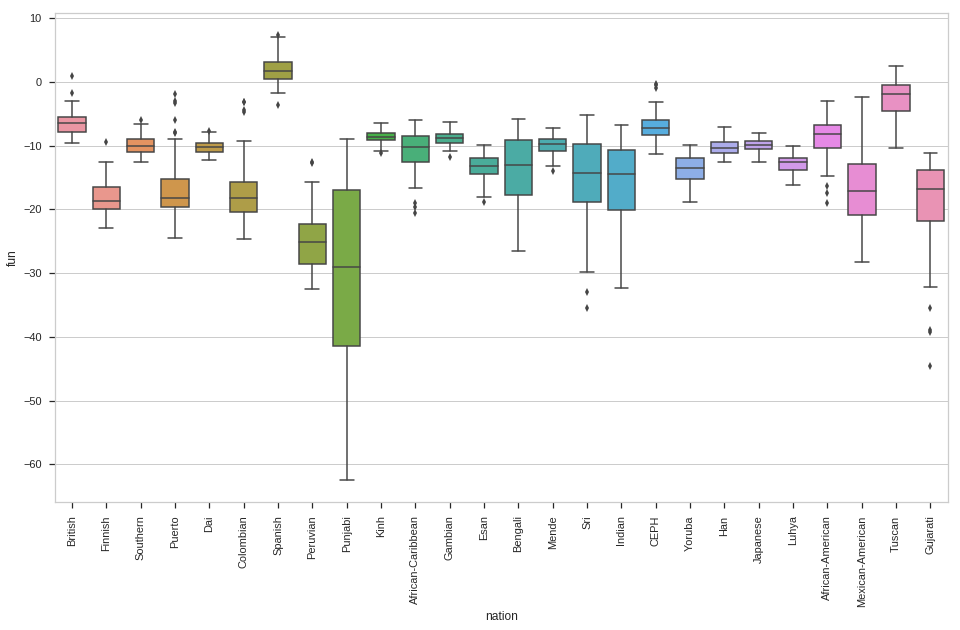

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.boxplot(x="nation", y="fun", data=df1, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [68]:
df2 = pd.DataFrame(
    {
        "fun": clf.decision_function(test_v2), 
        "proba": spclf.predict_proba(test_v2)[:, 1],
        "clf": clf.predict(test_v2),
        "group": groups
    }, 
    index=test_v2.index)
df2["nation"] = df2.group
df = pd.concat((df1, df2))

/home/cloucera/apps/miniconda3/envs/idp3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


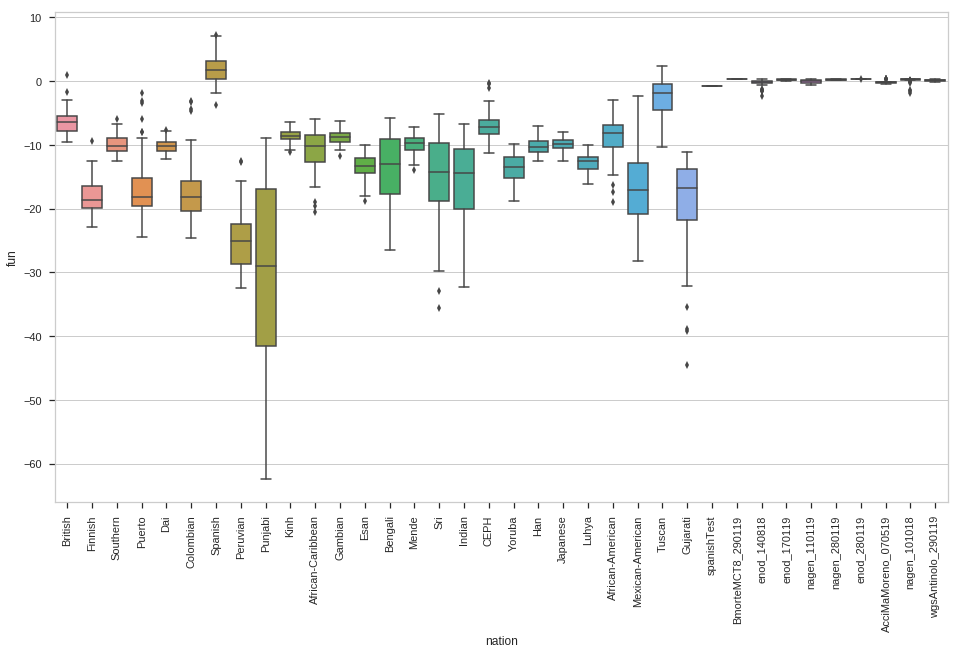

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.boxplot(x="nation", y="fun", data=df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
c2_pred = pd.Series(clf.predict(test_v2), index=test_v2.index)

In [ ]:
query_v2 = ["AC5399", "AC5378", "AC5390", "AC5409", "AC5415", "AC5532", "AC5533"]
df2.loc[query_v2, :]

In [ ]:
query = (df2.proba > 0.9) & (df2.clf == -1)
df2.loc[query, :]

In [ ]:
dfs = df.groupby("nation").describe().loc[["v2", "Spanish"], :]
dfs

In [ ]:
query = ((df2.fun < dfs.fun["25%"]["Spanish"]) | (df2.fun > dfs.fun["75%"]["Spanish"])) & (df2.proba > 0.99)
print(sum(query))
df2.loc[query, :]

In [ ]:
query = (df2.fun < dfs.fun["25%"]["Spanish"])  & (df2.proba > 0.99)
print(sum(query))
df2.loc[query, :]

In [ ]:
df.groupby("nation").describe().loc[["v2", "Spanish"], :]

In [ ]:
query = [x in ["Spanish", "Tuscan"] for x in ytr]

In [ ]:
xtr_q = xtr.loc[query, :]
ytr_q = ytr[query]

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

#xtr_q = KBinsDiscretizer(n_bins=2).fit_transform(xtr_q).todense()

In [ ]:
tsne = manifold.TSNE(init="pca", n_iter=10**4, metric=distance.correlation)
X_t = tsne.fit_transform(xtr_q)

data = pd.DataFrame(X_t, index=xtr.loc[query, :].index, columns=["tsne_0", "tsne_1"])
data["nationality"] = ytr_q
data["continent"] = ytr_q

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.set_palette("colorblind", n_colors=2)
sns.scatterplot(
    x="tsne_0",
    y="tsne_1",
    hue="nationality",
    style="nationality",
    data=data,
    ax=ax
)

# Put the legend out of the figure
lgnd = plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0., markerscale=2)
plt.setp(ax.get_legend().get_texts(), fontsize='14'); # for legend text

In [ ]:
query_ts = [x in ["Spanish", "Tuscan"] for x in yts]
xts_q = xts.loc[query_ts, :]
yts_q = yts[query_ts]

In [ ]:
# xts_q = KBinsDiscretizer(n_bins=2).fit_transform(xts_q).todense()

tsne = manifold.TSNE(init="pca", n_iter=10**4, metric=distance.correlation)
X_t = tsne.fit_transform(xts_q)

data = pd.DataFrame(X_t, index=xts.loc[query_ts, :].index, columns=["tsne_0", "tsne_1"])
data["nationality"] = yts_q
data["continent"] = yts_q

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.set_palette("colorblind", n_colors=2)
sns.scatterplot(
    x="tsne_0",
    y="tsne_1",
    hue="nationality",
    style="nationality",
    data=data,
    ax=ax
)

# Put the legend out of the figure
lgnd = plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0., markerscale=2)
plt.setp(ax.get_legend().get_texts(), fontsize='14'); # for legend text

In [ ]:
import sklearn

In [ ]:
from scipy.spatial import distance

In [ ]:
total_old = 30*6

In [ ]:
total_now = 30*4 + 19

In [ ]:
total_now * (1005 / total_old)

In [ ]:
1005 + 1585 + 1427

In [ ]:
19 * (1892 / 30 )

In [118]:
from skopt import BayesSearchCV

In [131]:
import pandas as pd
import numpy as np
import xgboost as xgb
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

# SETTINGS - CHANGE THESE TO GET SOMETHING MEANINGFUL
ITERATIONS = 10 # 1000

# Split into X and y
y = y_train_bin.copy()
X = X_train.copy()


# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = 7,
        objective = 'binary:logistic',
        eval_metric = 'aucpr',
        silent=1,
        tree_method='approx'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    scoring = 'average_precision',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 7,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest PR-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [132]:
result = bayes_cv_tuner.fit(X.values, y, callback=status_print)

Model #1
Best PR-AUC: 0.5755
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.13031389926541354, 'learning_rate': 0.042815319280763466, 'max_delta_step': 13, 'max_depth': 21, 'min_child_weight': 2, 'n_estimators': 87, 'reg_alpha': 5.497557739289786e-07, 'reg_lambda': 0.05936070635912049, 'scale_pos_weight': 0.060830282487222144, 'subsample': 0.13556548021189216}

Model #2
Best PR-AUC: 0.7817
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 4.358684608480795e-07, 'learning_rate': 0.7988179462781242, 'max_delta_step': 17, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 68, 'reg_alpha': 0.0005266983003701547, 'reg_lambda': 276.5424475574225, 'scale_pos_weight': 0.3016410771843142, 'subsample': 0.9923710598637134}

Model #3
Best PR-AUC: 0.7817
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 4.358684608480795e-07, 'lea

In [134]:
result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree',
       colsample_bylevel=0.955923206446829,
       colsample_bytree=0.7036152301751524, eval_metric='aucpr',
       gamma=0.03823613443879595, learning_rate=0.06786442521779147,
       max_delta_step=8, max_depth=11, min_child_weight=0, missing=None,
       n_estimators=69, n_jobs=7, nthread=None,
       objective='binary:logistic', random_state=0,
       reg_alpha=0.00022356829889037284, reg_lambda=1.2908532337409298e-07,
       scale_pos_weight=4.73588486119117, seed=None, silent=1,
       subsample=0.4499578015509351, tree_method='approx')